DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitor. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum dilakukan permodelan.

Pada tugas kali ini, kamu akan melakukan Data Preprocessing (Data Cleansing) bulan lalu, yakni Juni 2020.

Langkah yang akan dilakukan adalah,

1. Mencari ID pelanggan (Nomor telepon) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4. Menstandardisasi Nilai dari Variable


In [ ]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head(10))

#Jumlah ID yang unik
print(df_load.customerID.nunique())

**Filter ID Number Pelanggan Format Tertentu**

Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

Panjang karakter adalah 11-12.
Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
Diawali dengan angka 45 2 digit pertama.
 
Gunakan fungsi count() untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan str.match() & regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan astype() untuk merubah tipe datanya yang semula numeric

Notes : Buat kolom bantuan baru dengan nama `valid_id`

In [ ]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = df_load[df_load['valid_id'] == True].drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

**Memfilter Duplikasi ID Number Pelanggan**

Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
Duplikasi dikarenakan inserting beda periode pengambilan data
Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk diolah di tahap ini. Gunakan fungsi drop_duplicates() untuk menghapus duplikasi rows, dan gunakan sort_values() untuk mengecek pengambilan data terakhir.

In [ ]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

**Mengatasi Missing Values dengan Penghapusan Rows**

Selanjutnya kita akan menghapus rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Diasumsikan data modeller hanya mau menerima data yang benar ada flag churn-nya atau tidak.

Gunakan isnull() digunakan untuk mendeteksi missing values dan dropna() untuk menghapus data yang missing values.

In [ ]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

* Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.
* Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

Tentukan:

* Apakah masih ada data yang missing values
* Jumlah missing values dari masing-masing variable
* Tangani missing values-nya

In [ ]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
    
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

**Mendeteksi Adanya Outlier Menggunakan Boxplot**

Mendeteksi pencilan dari suatu nilai (*outlier*) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (*skewness*), ukuran tendensi sentral dan ukuran penyebaran (keragaman). 


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


/tmp/ipykernel_31/668987232.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)
/tmp/ipykernel_31/668987232.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

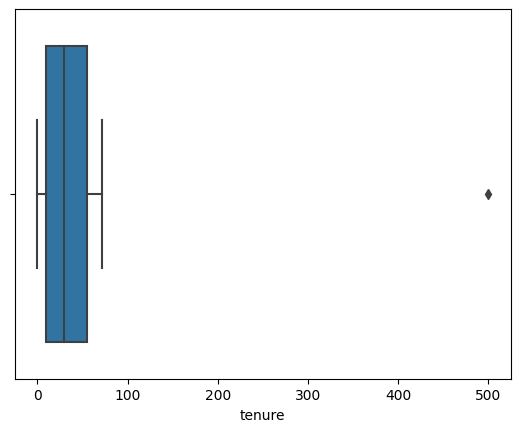

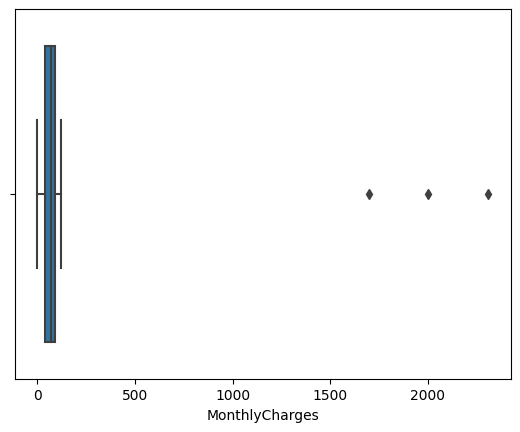

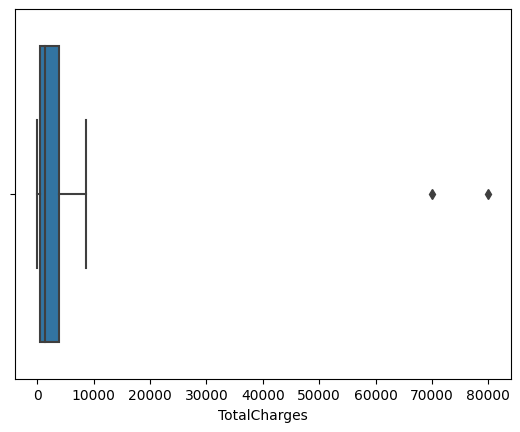

In [5]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

In [13]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

# Subset kolom target
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Hitung IQR
Q1 = df_load[cols].quantile(0.25)
Q3 = df_load[cols].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas atas dan bawah
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

# Align operand agar bisa dimask
data = df_load[cols]
more_than, _ = data.align(maximum, axis=1, copy=False)
lower_than, _ = data.align(minimum, axis=1, copy=False)

# Terapkan masking
df_load[cols] = data.mask(data > more_than, maximum, axis=1)
df_load[cols] = df_load[cols].mask(df_load[cols] < lower_than, minimum, axis=1)

# Cek hasil
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[cols].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


/tmp/ipykernel_31/3688129001.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)
/tmp/ipykernel_31/3688129001.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**Kesimpulan**

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

**Mendeteksi Nilai yang tidak Standar**

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

Gunakan fungsi value_counts() untuk melihat jumlah data unique per variable-nya.

In [15]:
import pandas as pd

# Load dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Validasi customerID
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = df_load[df_load['valid_id'] == True].drop('valid_id', axis=1)

# Drop duplikat
df_load = df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

# Drop missing Churn
df_load.dropna(subset=['Churn'], inplace=True)

# Imputasi missing value
df_load['tenure'].fillna(11, inplace=True)
for col_name in ['MonthlyCharges', 'TotalCharges']:
    df_load[col_name].fillna(df_load[col_name].median(), inplace=True)

# Tangani outlier hanya pada kolom numerik
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df_load[cols].quantile(0.25)
Q3 = df_load[cols].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + 1.5 * IQR
minimum = Q1 - 1.5 * IQR

# Align operand dan apply masking
for col in cols:
    df_load[col] = df_load[col].mask(df_load[col] > maximum[col], maximum[col])
    df_load[col] = df_load[col].mask(df_load[col] < minimum[col], minimum[col])

# Tampilkan nilai unik tiap kolom kategori
categoricals = [
    'gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'
]

for col in categoricals:
    print(f'\nUnique Values Count Before Standardized Variable "{col}"')
    print(df_load[col].value_counts())


Unique Values Count Before Standardized Variable "gender"
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized Variable "SeniorCitizen"
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized Variable "Partner"
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized Variable "Dependents"
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized Variable "PhoneService"
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable "MultipleLines"
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable "InternetService"
InternetService
Fiber optic    3057
DSL            2388
No             1505
Nam

/tmp/ipykernel_31/3179905393.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)
/tmp/ipykernel_31/3179905393.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**Menstandarisasi Variable Kategorik**

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard, maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. Gunakan fungsi replace() untuk menstandardkan nilai.

In [17]:
import pandas as pd

# 1. Load data
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# 2. Clean customerID
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = df_load[df_load['valid_id']].drop('valid_id', axis=1)

# 3. Remove duplicates - keep last record for each customer
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

# 4. Handle missing values in Churn column
df_load = df_load.dropna(subset=['Churn'])

# 5. Fill missing values
df_load['tenure'] = df_load['tenure'].fillna(11)
for col in ['MonthlyCharges', 'TotalCharges']:
    df_load[col] = df_load[col].fillna(df_load[col].median())

# 6. Handle outliers using IQR method
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df_load[numerical_cols].quantile(0.25)
Q3 = df_load[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values to handle outliers
for col in numerical_cols:
    df_load[col] = df_load[col].clip(lower_bound[col], upper_bound[col])

# 7. Standardize categorical values
replace_dict = {
    'Wanita': 'Female',
    'Laki-Laki': 'Male',
    'Churn': 'Yes',
    'Iya': 'Yes'
}
df_load = df_load.replace(replace_dict)

# 8. Display value counts for categorical columns
for col in ['gender', 'Dependents', 'Churn']:
    print(f'\nUnique Values Count After Standardized Variable {col}:')
    print(df_load[col].value_counts())


Unique Values Count After Standardized Variable gender:
gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized Variable Dependents:
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized Variable Churn:
Churn
No     5114
Yes    1836
Name: count, dtype: int64
